In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_df = pd.read_table("train.tsv")
print(train_df.shape)
train_df.head(5)

(1482535, 8)


,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NaN,10.0,1,No description yet
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...
3,3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,NaN,35.0,1,New with tags. Leather horses. Retail for [rm]...
4,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,NaN,44.0,0,Complete with certificate of authenticity


In [3]:
train_df.nunique()

train_id             1482535
name                 1225273
item_condition_id          5
category_name           1287
brand_name              4809
price                    828
shipping                   2
item_description     1281426
dtype: int64

In [4]:
# ------------------------ have a look for 'item_condition_id' ----------------------------
train_df['item_condition_id'].value_counts()

1    640549
3    432161
2    375479
4     31962
5      2384
Name: item_condition_id, dtype: int64

In [5]:
train_df['item_condition_id'].value_counts() / train_df.shape[0]

1    0.432063
3    0.291501
2    0.253268
4    0.021559
5    0.001608
Name: item_condition_id, dtype: float64

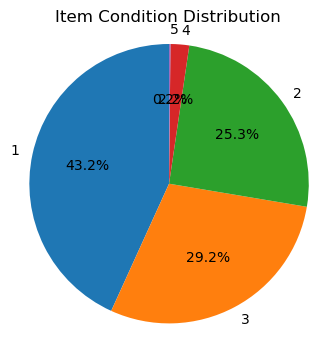

In [6]:
# Create a pie chart
fig, ax = plt.subplots(figsize=(4,4))
ax.pie(
    train_df['item_condition_id'].value_counts().values,
    labels=train_df['item_condition_id'].value_counts().index,
    autopct='%1.1f%%',
    startangle=90,
)

ax.set_title('Item Condition Distribution')

ax.axis('equal')

plt.show()

In [7]:
train_df['item_condition_id'].isnull().sum()

0

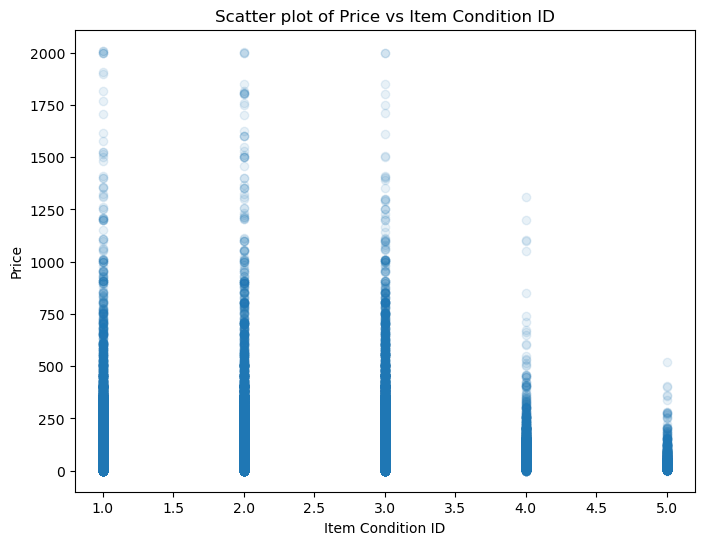

In [8]:
# Analyze numerical feature. The relationship between items_condition_id and price
plt.figure(figsize=(8, 6))
plt.scatter(train_df['item_condition_id'], train_df['price'], alpha=0.1)
plt.xlabel('Item Condition ID')
plt.ylabel('Price')
plt.title('Scatter plot of Price vs Item Condition ID')
plt.show()

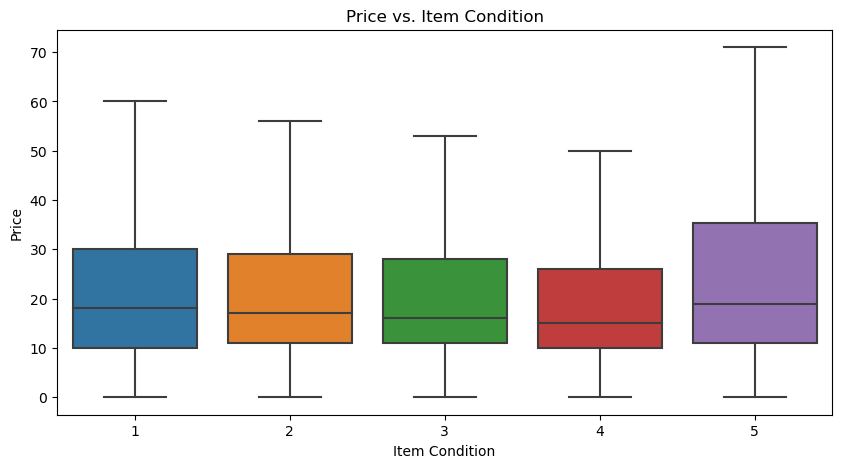

In [9]:
# Box plot of product conditions and prices
plt.figure(figsize=(10, 5))
sns.boxplot(x='item_condition_id', y='price', data=train_df, showfliers=False)
plt.title("Price vs. Item Condition")
plt.xlabel("Item Condition")
plt.ylabel("Price")
plt.show()

In [10]:
#  There are five types of values for 'item_ condition_id ', with no missing values. Among them, the one with id 1 accounts for the most, up to 43%

In [11]:
# ------------------------ have a look for 'category_name' ----------------------------
print(f"There are {train_df['category_name'].nunique()} kinds category_name in train")
print(f"Among them, {train_df['category_name'].isnull().sum()} pieces of data are missing, accounting for {train_df['category_name'].isnull().sum()/train_df.shape[0]}")
# Relative to 3460725 total data 'category_ Missing values in name 'are not considered severe
# Observed category_ The name is composed of three parts and should be subdivided

There are 1287 kinds category_name in train
Among them, 6327 pieces of data are missing, accounting for 0.004267690138850011


In [12]:
print('The most popular 5 category_name')
train_df['category_name'].value_counts()[:5]

The most popular 5 category_name


Women/Athletic Apparel/Pants, Tights, Leggings    60177
Women/Tops & Blouses/T-Shirts                     46380
Beauty/Makeup/Face                                34335
Beauty/Makeup/Lips                                29910
Electronics/Video Games & Consoles/Games          26557
Name: category_name, dtype: int64

<Figure size 1500x600 with 0 Axes>

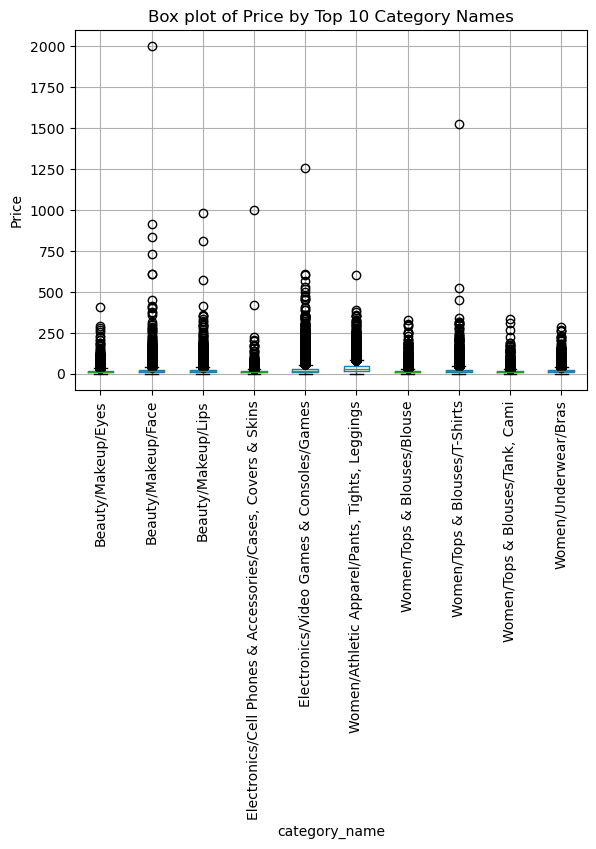

In [13]:
# Calculate brand_ Number of occurrences of each brand in name
category_counts = train_df['category_name'].value_counts()

# Select the top 10 most common brands
top_10_categories = category_counts.head(10).index

# Filter train_ DF, only retain data for these 10 brands
filtered_train_df = train_df[train_df['category_name'].isin(top_10_categories)]

# created box plot
plt.figure(figsize=(15, 6))
filtered_train_df.boxplot(column='price', by='category_name', rot=90)
plt.ylabel('Price')
plt.title('Box plot of Price by Top 10 Category Names')
plt.suptitle('')
plt.show()

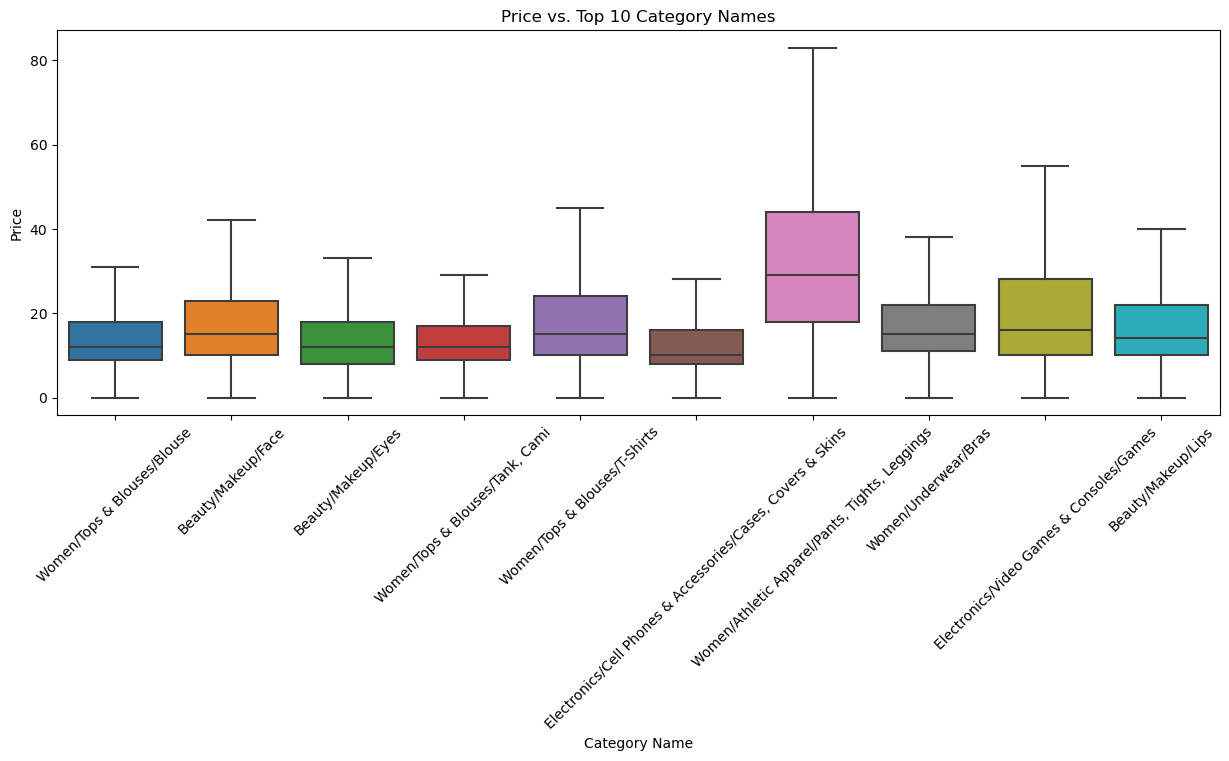

In [14]:
# Top 10 box charts for category names and prices
top_10_categories = train_df["category_name"].value_counts().nlargest(10).index
train_df_top_categories = train_df[train_df["category_name"].isin(top_10_categories)]

plt.figure(figsize=(15, 5))
sns.boxplot(x='category_name', y='price', data=train_df_top_categories, showfliers=False)
plt.title("Price vs. Top 10 Category Names")
plt.xlabel("Category Name")
plt.ylabel("Price")
plt.xticks(rotation=45)
plt.show()

In [15]:
# We can find Dominant position in women and beauty industry

In [16]:
# ------------------------ have a look for 'brand_name' ----------------------------
print(f"There are {train_df['brand_name'].nunique()} kinds brand_name in train")
print(f"Among them, {train_df['brand_name'].isnull().sum()} pieces of data are missing, accounting for {train_df['brand_name'].isnull().sum()/train_df.shape[0]}")
# Serious missing value phenomenon

There are 4809 kinds brand_name in train
Among them, 632682 pieces of data are missing, accounting for 0.4267568725190299


In [17]:
print('The most polular brand_name')
train_df['brand_name'].value_counts()[:5]

The most polular brand_name


PINK                 54088
Nike                 54043
Victoria's Secret    48036
LuLaRoe              31024
Apple                17322
Name: brand_name, dtype: int64

In [18]:
(train_df['brand_name'].value_counts()/ train_df.shape[0])[:5]

PINK                 0.036483
Nike                 0.036453
Victoria's Secret    0.032401
LuLaRoe              0.020926
Apple                0.011684
Name: brand_name, dtype: float64

<Figure size 1500x600 with 0 Axes>

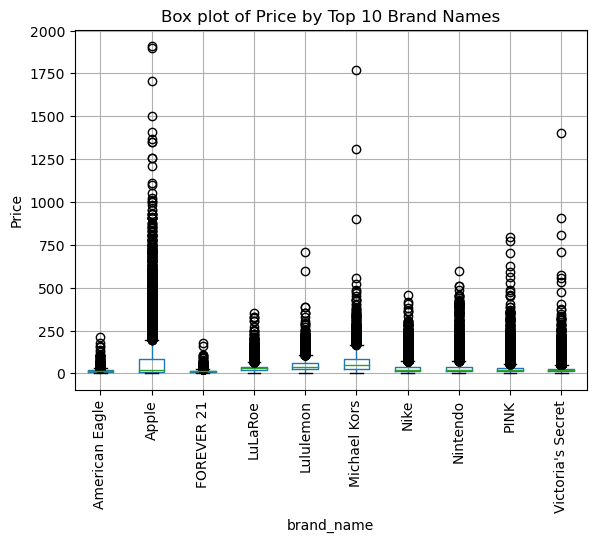

In [19]:
# Calculate brand_ Number of occurrences of each brand in name
brand_counts = train_df['brand_name'].value_counts()

# Select the top 10 most common brands
top_10_brands = brand_counts.head(10).index

# Filter train_ DF, only retain data for these 10 brands
filtered_train_df = train_df[train_df['brand_name'].isin(top_10_brands)]


plt.figure(figsize=(15, 6))
filtered_train_df.boxplot(column='price', by='brand_name', rot=90)
plt.ylabel('Price')
plt.title('Box plot of Price by Top 10 Brand Names')
plt.suptitle('')
plt.show()

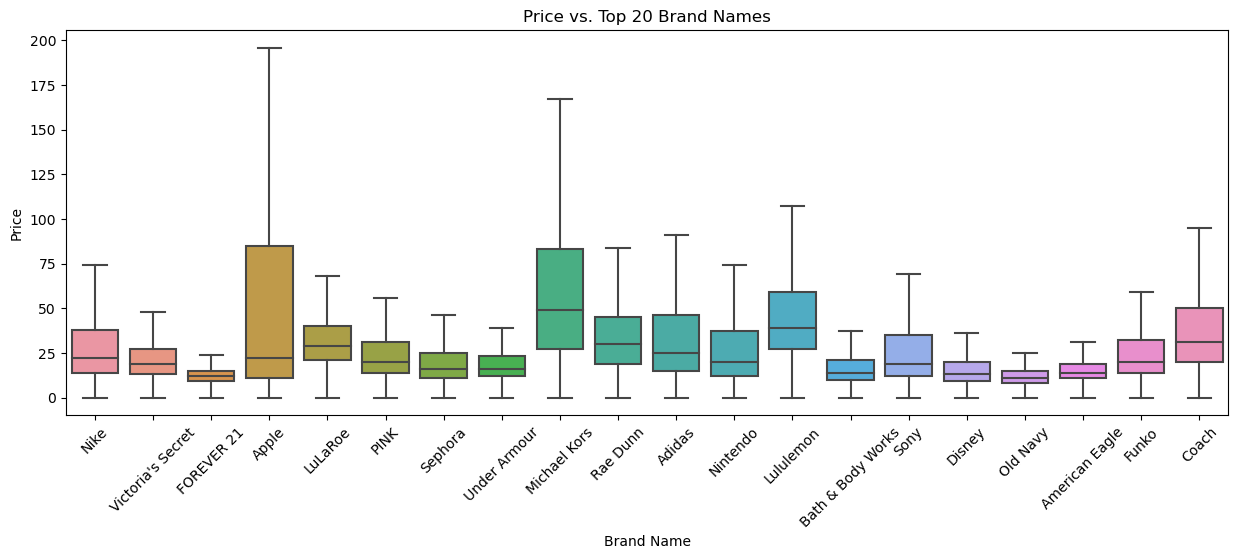

In [20]:
# Top 20 box charts of brand name and price
top_20_brands = train_df["brand_name"].value_counts().nlargest(20).index
train_df_top_brands = train_df[train_df["brand_name"].isin(top_20_brands)]

plt.figure(figsize=(15, 5))
sns.boxplot(x='brand_name', y='price', data=train_df_top_brands, showfliers=False)
plt.title("Price vs. Top 20 Brand Names")
plt.xlabel("Brand Name")
plt.ylabel("Price")
plt.xticks(rotation=45)
plt.show()

In [21]:
# ------------------------ have a look for 'price' ----------------------------
np.set_printoptions(suppress=True)
pd.set_option('display.float_format', lambda x:'%.2f'%x)
train_df.price.describe()

count   1482535.00
mean         26.74
std          38.59
min           0.00
25%          10.00
50%          17.00
75%          29.00
max        2009.00
Name: price, dtype: float64

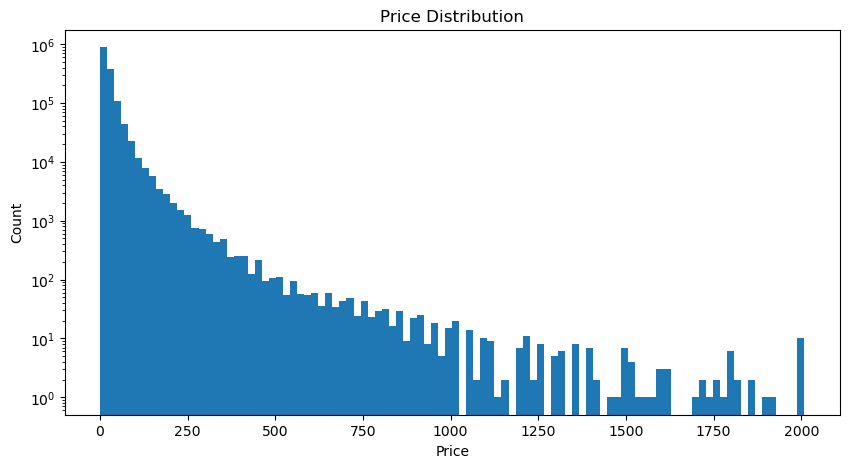

In [22]:
# Price distribution chart
plt.figure(figsize=(10, 5))
plt.hist(train_df['price'], bins=100, log=True)
plt.title("Price Distribution")
plt.xlabel("Price")
plt.ylabel("Count")
plt.show()

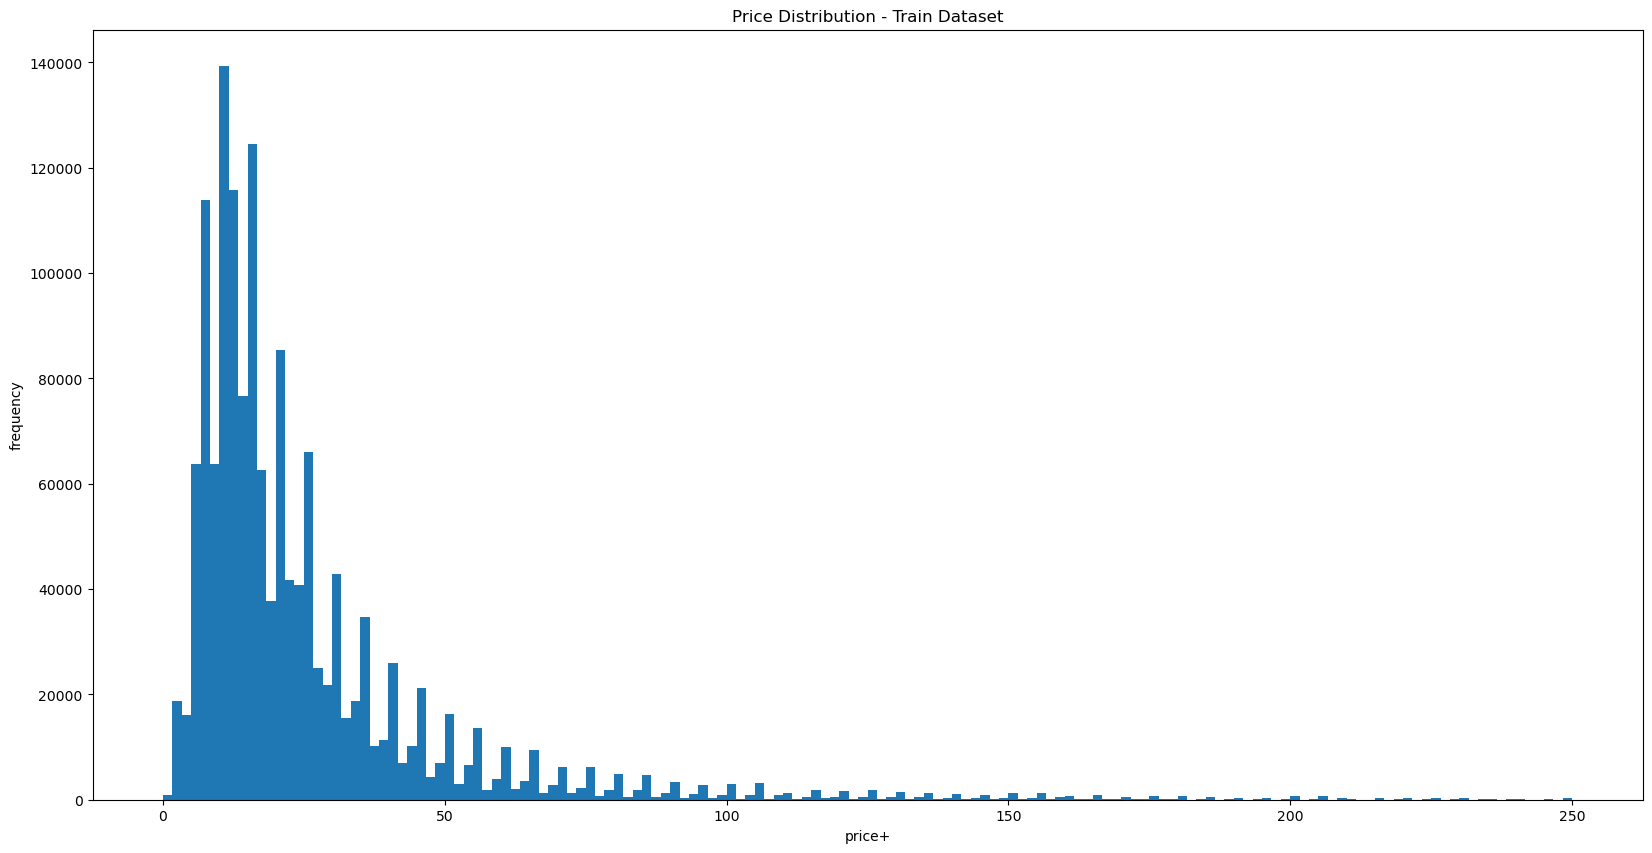

In [23]:
(train_df['price']).plot.hist(bins=150, figsize=(20,10),range=[0,250])
plt.xlabel('price+')
plt.ylabel('frequency')
plt.title('Price Distribution - Train Dataset')
plt.show()

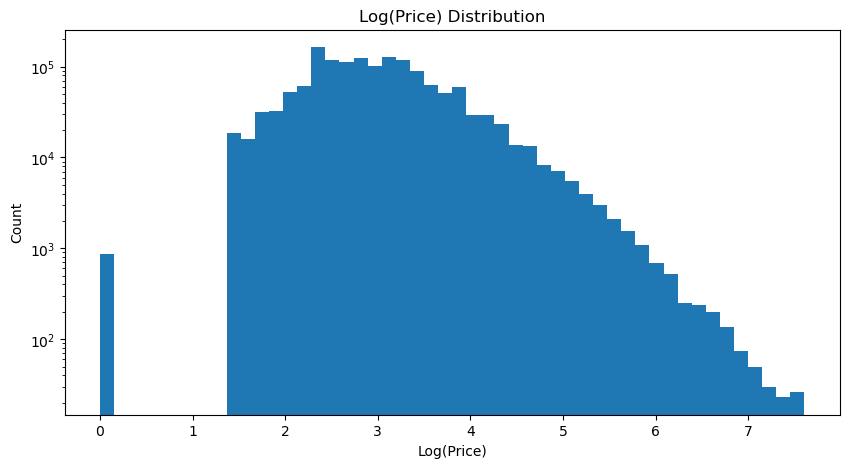

In [24]:
# Products with lower prices are more frequent than those with higher prices. Reduce the impact of extreme values (outlier) on the entire data distribution, and convert the skewed distribution data into data closer to the normal distribution, so as to facilitate the use of the linear model
# np.log(train_df['price']+1).plot.hist(bins=50, figsize=(20,10))
# plt.xlabel('log(price+1)')
# plt.ylabel('frequency')
# plt.title('Log(Price) Distribution - Train Dataset')
# plt.show()

plt.figure(figsize=(10, 5))
plt.hist(np.log(train_df['price']+1), bins=50, log=True)
plt.title("Log(Price) Distribution")
plt.xlabel("Log(Price)")
plt.ylabel("Count")
plt.show()

In [25]:
# ------------------- shipping only have 0 and 1 ---------------------
(train_df['shipping'].value_counts()/ train_df.shape[0])[:5]

0   0.55
1   0.45
Name: shipping, dtype: float64

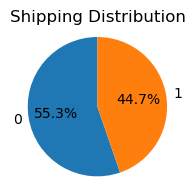

In [26]:
# Calculate the percentage distribution of shipping
shipping_percent = (train_df['shipping'].value_counts())

# created a pie chart
fig, ax = plt.subplots(figsize=(2,2))
ax.pie(
    shipping_percent.values,
    labels=shipping_percent.index,
    autopct='%1.1f%%',
    startangle=90,
)

ax.set_title('Shipping Distribution')

ax.axis('equal')

plt.show()

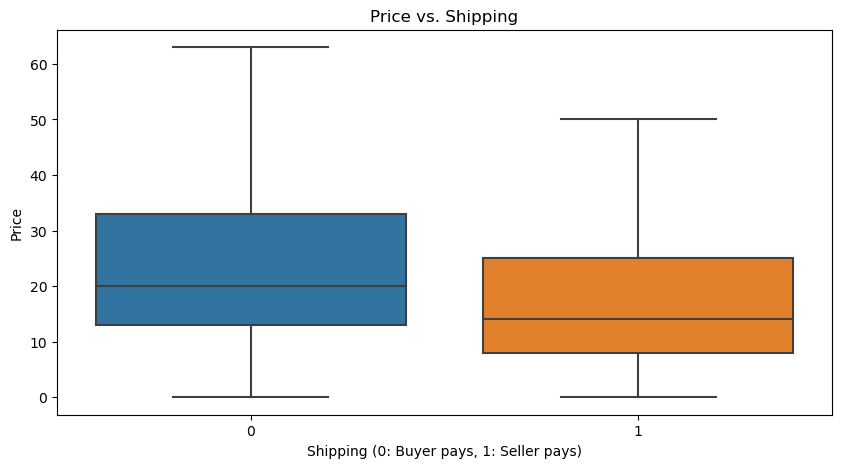

In [27]:
# Box diagram of delivery methods and prices
plt.figure(figsize=(10, 5))
sns.boxplot(x='shipping', y='price', data=train_df, showfliers=False)
plt.title("Price vs. Shipping")
plt.xlabel("Shipping (0: Buyer pays, 1: Seller pays)")
plt.ylabel("Price")
plt.show()